In [1]:
print("Yo lets get it")

Yo lets get it


/======================================================\
|                                                      |
|            🏗️ ŞANTİYE-01: HAMBURG YOLCULUĞU            |
|                  MANİFESTO ve KURALLAR                |
|                                                      |
| 🎯 AMAÇ:                                             |
|   - Özgür, bilinçli üretim alanı kurmak.              |
|   - Süreçten değer üretmek, sonuca tapan değil.       |
|   - İrade ve özgür seçimle ilerlemek.                 |
|   - Hata yapmayı, keşif olarak görmek.                |
|                                                      |
| 📜 MANİFESTO:                                        |
|   1. Başlama cesareti zaferdir.                      |
|   2. Süreç, sonuçtan değerlidir.                     |
|   3. Seçim özgürlüğü kutsaldır.                      |
|   4. Hatalar inşaatın tuğlalarıdır.                   |
|   5. Plan esnektir, rota değişebilir.                |
|   6. Kurban zihniyeti yasaktır.                      |
|   7. Her küçük adım kutlanır.                        |
|   8. Araştırmak ve merak ana motordur.                |
|                                                      |
| 🛠️ KURALLAR:                                         |
|   - Başka projelerle kıyaslama yapılmaz.             |
|   - Yavaşlamak serbesttir, durmak yoktur.            |
|   - Anlaşılmayan yerde mutlaka soru sorulur.         |
|   - Haftada bir minik adım şarttır.                  |
|   - Eğlenme zorunlu değil, zorluk da süreçtir.        |
|     Ama yani eglenmek istiyosan format değişir        |\======================================================/

In [1]:
# İlk adım: Temel kütüphaneleri içe aktar
import streamlit as st
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf


In [2]:
%matplotlib inline

# Setup
ticker_symbol = "AAPL"
ticker = yf.Ticker(ticker_symbol)

# Pull earnings dates
earnings_df = ticker.earnings_dates

# Filter past earnings dates
today = pd.Timestamp.today(tz="America/New_York")
past_earnings_df = earnings_df[earnings_df.index < today]

# Clean listing
print("\nAvailable Past Earnings Dates:")
for idx, date in enumerate(past_earnings_df.index):
    est = past_earnings_df.iloc[idx]['EPS Estimate']
    rep = past_earnings_df.iloc[idx]['Reported EPS']
    print(f"{idx}: {date.date()} | Est: {est:.2f} | Rep: {rep:.2f}")


Available Past Earnings Dates:
0: 2025-05-01 | Est: 1.63 | Rep: 1.65
1: 2025-01-30 | Est: 2.35 | Rep: 2.40
2: 2024-10-31 | Est: 1.60 | Rep: 1.64
3: 2024-08-01 | Est: 1.35 | Rep: 1.40
4: 2024-05-02 | Est: 1.50 | Rep: 1.53
5: 2024-02-01 | Est: 2.10 | Rep: 2.18
6: 2023-11-02 | Est: 1.39 | Rep: 1.46
7: 2023-08-03 | Est: 1.19 | Rep: 1.26


In [ ]:
# User selects
choice = int(input("\nSelect the earnings report number you want to chart (example: 0, 1, 2...): "))
selected_earnings_date = past_earnings_df.index[choice]

print(f"\nSelected Earnings Date: {selected_earnings_date.date()}")

In [6]:
#apperantly inputs are broken here.
choice = 0  # or whatever you pick
selected_earnings_date = past_earnings_df.index[choice]

# ⚡ Fix timezone mismatch
selected_earnings_date = selected_earnings_date.tz_convert(None)

print(f"\nSelected Earnings Date: {selected_earnings_date.date()}")


Selected Earnings Date: 2025-05-01


In [7]:
# Create a new column for "relative days from earnings date"
stock_data['Days From Earnings'] = (stock_data.index - selected_earnings_date).days

NameError: name 'stock_data' is not defined

In [8]:
# Calculate 7-day Moving Average
stock_data['MA7'] = stock_data['Close'].rolling(window=7).mean()

NameError: name 'stock_data' is not defined

In [3]:
# Assume stock_data['Days From Earnings'] and stock_data['MA7'] already calculated

plt.figure(figsize=(14,6))

# Plot raw Close price in light gray
plt.plot(stock_data['Days From Earnings'], stock_data['Close'], 
         color='black', alpha=0.5, linewidth=1.8, label='Close Price')

# Plot 7-Day Moving Average in bold blue
plt.plot(stock_data['Days From Earnings'], stock_data['MA7'], 
         color='dodgerblue', linewidth=2.5, label='7-Day Moving Avg')

# Highlight Earnings Day with a semi-transparent red band
plt.axvspan(-1, 1, color='red', alpha=0.2, label='Earnings Day Window')

# Set custom x-ticks every 10 days
plt.xticks(np.arange(-60, 61, 10))

# Check if it was a beat or miss
actual_eps = past_earnings_df.iloc[choice]['Reported EPS']
estimate_eps = past_earnings_df.iloc[choice]['EPS Estimate']

if actual_eps > estimate_eps:
    color = 'green'
    label = 'Beat'
else:
    color = 'red'
    label = 'Miss'

# Plot marker at day 0
plt.scatter(0, stock_data.loc[stock_data['Days From Earnings'] == 0, 'Close'].values[0],
            color=color, s=100, zorder=5, label=f'Earnings {label}')

# Titles and labels
plt.title(f"{ticker_symbol} Price Movement + 7-Day MA Around {selected_earnings_date.date()}", fontsize=14)
plt.xlabel('Days From Earnings', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.show()

NameError: name 'stock_data' is not defined

<Figure size 1400x600 with 0 Axes>

YF.download() has changed argument auto_adjust default to True


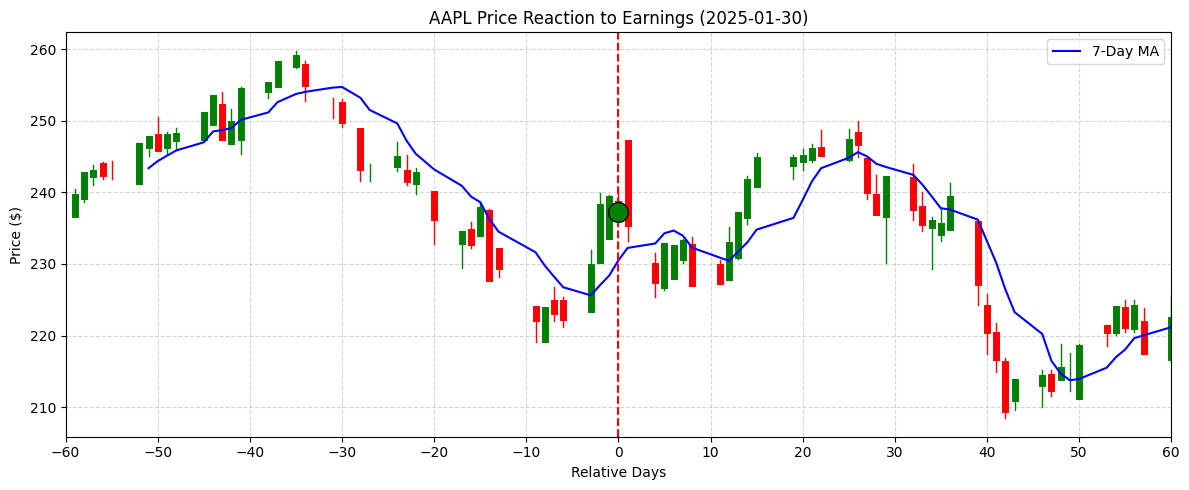

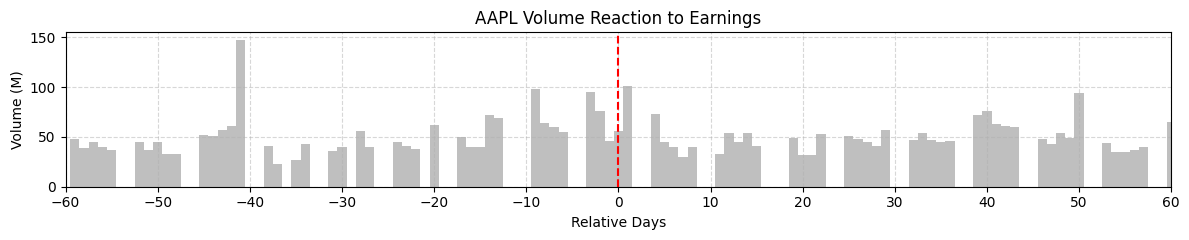

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Veri Çekimi ve Temizleme ---

ticker_symbol = "AAPL"
start_date = "2024-01-01"
end_date = "2025-04-01"

# Veri çek
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)

# MultiIndex düzelt
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.droplevel(1)

# OHLCV seç
ohlcv_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlcv_data.dropna(inplace=True)

# --- Step 2: Earnings Bilgisi ---

selected_earnings_date = pd.Timestamp("2025-01-30")

# En yakın trading günü bul
nearest_trading_date = ohlcv_data.index[ohlcv_data.index.get_indexer([selected_earnings_date], method='nearest')][0]

# Hit / Miss bilgisi (örnek)
actual_eps = 2.40
estimate_eps = 2.35
marker_color = 'green' if actual_eps > estimate_eps else 'red'

# --- Step 3: 60 Günlük Window ve Relative Days ---

window = 60
start_window = nearest_trading_date - pd.Timedelta(days=window)
end_window = nearest_trading_date + pd.Timedelta(days=window)

subset_data = ohlcv_data[(ohlcv_data.index >= start_window) & (ohlcv_data.index <= end_window)].copy()

subset_data['Relative_Days'] = (subset_data.index - nearest_trading_date).days

# --- Step 4: Price Chart (Candlestick + MA7 + Hit/Miss Marker) ---

fig, ax = plt.subplots(figsize=(12, 5))

# Candle tarzı çizim
for idx, row in subset_data.iterrows():
    color = 'green' if row['Close'] >= row['Open'] else 'red'
    ax.plot([row['Relative_Days'], row['Relative_Days']], [row['Low'], row['High']], color=color, linewidth=1)
    ax.plot([row['Relative_Days'], row['Relative_Days']], [row['Open'], row['Close']], color=color, linewidth=5)

# MA7 ekle
subset_data['MA7'] = subset_data['Close'].rolling(window=7).mean()
ax.plot(subset_data['Relative_Days'], subset_data['MA7'], color='blue', linewidth=1.5, label='7-Day MA')

# Hit/Miss Marker
ax.scatter(0, subset_data.loc[nearest_trading_date]['Close'], color=marker_color, s=200, marker='o', edgecolor='black', zorder=5)

# Earnings Günü Çizgisi
ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5)

# X-ticks düzeni (10'luk adımlar)
ax.set_xticks(np.arange(-60, 61, 10))
ax.set_xlim(-60, 60)

ax.set_xlabel('Relative Days')
ax.set_ylabel('Price ($)')
ax.set_title(f"{ticker_symbol} Price Reaction to Earnings ({nearest_trading_date.date()})")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

# --- Step 5: Volume Chart (Relative Days) ---

fig, ax = plt.subplots(figsize=(12, 2.5))

ax.bar(subset_data['Relative_Days'], subset_data['Volume'] / 1e6, width=1, color='gray', alpha=0.5)

ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5)

ax.set_xlabel('Relative Days')
ax.set_ylabel('Volume (M)')
ax.set_title(f"{ticker_symbol} Volume Reaction to Earnings")
ax.set_xticks(np.arange(-60, 61, 10))
ax.set_xlim(-60, 60)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [12]:
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# --- Sidebar seçimleri ---
st.sidebar.title("📊 Earnings Chart Generator")

# Ticker seç
ticker = st.sidebar.selectbox("Select Ticker", ["AAPL", "MSFT", "NVDA"])

# Earnings tarihlerini yfinance'tan çek
def get_earnings_dates(ticker):
    try:
        stock = yf.Ticker(ticker)
        df = stock.calendar.T
        return list(df.index)
    except:
        return []

earnings_dates = get_earnings_dates(ticker)
earnings_date = st.sidebar.selectbox("Select Earnings Date", earnings_dates)

# Generate butonu
if st.sidebar.button("Generate Chart"):

    # Veri çek
    data = yf.download(ticker, period="6mo")

    # En yakın trading günü
    earnings_ts = pd.to_datetime(earnings_date)
    trading_day = data.index[data.index.get_indexer([earnings_ts], method='nearest')[0]]

    # Subset al
    window = 60
    start = trading_day - pd.Timedelta(days=window)
    end = trading_day + pd.Timedelta(days=window)
    subset = data[(data.index >= start) & (data.index <= end)].copy()

    # Relative days
    subset["Relative_Days"] = (subset.index - trading_day).days

    # Grafik
    fig, ax = plt.subplots(figsize=(12, 5))

    for idx, row in subset.iterrows():
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        ax.plot([row['Relative_Days']] * 2, [row['Low'], row['High']], color=color)
        ax.plot([row['Relative_Days']] * 2, [row['Open'], row['Close']], color=color, linewidth=5)

    subset["MA7"] = subset["Close"].rolling(7).mean()
    ax.plot(subset["Relative_Days"], subset["MA7"], color='blue', label="7-Day MA")

    ax.axvline(0, color='red', linestyle='--')
    ax.set_xticks(range(-60, 61, 10))
    ax.set_title(f"{ticker} — Earnings Chart Around {earnings_ts.date()}")
    ax.set_xlabel("Relative Days")
    ax.set_ylabel("Price ($)")
    ax.grid(True)
    ax.legend()

    st.pyplot(fig)

2025-05-02 14:28:08.284 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.366 
  command:

    streamlit run /Users/barisyuksek/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-02 14:28:08.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 14:28:08.370 Ses